## Limpieza de los datos

In [6]:
# 1. Importamos librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# 2. Cargamos el dataset
data = pd.read_csv(r"C:\Users\Borja\Desktop\Analisis de Datos\DATASETS\Online Sales Project\Online Sales Data.csv")

# 3. Mostramos las primeras filas para una vista general
data.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


In [8]:
# 4. Comprobamos si hay valores nulos en el dataset
null_values = data.isnull().sum()
null_values

Transaction ID      0
Date                0
Product Category    0
Product Name        0
Units Sold          0
Unit Price          0
Total Revenue       0
Region              0
Payment Method      0
dtype: int64

In [9]:
# 5. Comprobamos si hay filas duplicadas
duplicate_rows = data.duplicated().sum()
duplicate_rows

np.int64(0)

In [10]:
# 6. Descripción general de la columna de fechas
date_info = data['Date'].describe()
date_info

count            240
unique           240
top       2024-01-01
freq               1
Name: Date, dtype: object

In [11]:
# 7. Convertimos la columna 'Date' al tipo datetime para facilitar el análisis temporal
data['Date'] = pd.to_datetime(data['Date'])

data.dtypes

Transaction ID               int64
Date                datetime64[ns]
Product Category            object
Product Name                object
Units Sold                   int64
Unit Price                 float64
Total Revenue              float64
Region                      object
Payment Method              object
dtype: object

In [12]:
# 8. Separamos la fecha en año, mes, día, nombre del día de la semana y número de semana.
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month_name()
data['Day'] = data['Date'].dt.day
data['Day_of_Week'] = data['Date'].dt.day_name()
data['Week_Number'] = data['Date'].dt.isocalendar().week

data.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method,Year,Month,Day,Day_of_Week,Week_Number
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card,2024,January,1,Monday,1
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal,2024,January,2,Tuesday,1
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card,2024,January,3,Wednesday,1
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card,2024,January,4,Thursday,1
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal,2024,January,5,Friday,1


# 💳 Análisis de métodos de pago

## **Comportamiento y preferencia de pago**

### **1.** ¿Qué métodos de pago se utilizan con mayor frecuencia?

In [13]:
# Contamos cuántas veces se ha usado cada método de pago
payment_counts = data['Payment Method'].value_counts().reset_index()
payment_counts.columns = ['Payment Method', 'Transactions']
payment_counts

# Calculamos el porcentaje de transacciones por método de pago
payment_counts['Percentage'] = ((payment_counts['Transactions'] / payment_counts['Transactions'].sum()) * 100).round(2)
payment_counts

,Payment Method,Transactions,Percentage
0,Credit Card,120,50.00
1,PayPal,80,33.33
2,Debit Card,40,16.67


✅ **Respuesta:**

- El método de pago más utilizado es la **tarjeta de crédito**, con 120 transacciones (**50%**).

- **PayPal** es el segundo método más frecuente, con 80 transacciones (**33.33%**).

- La **tarjeta de débito** en tercer lugar, con 40 transacciones (**16.67%**).

Esto indica que la mitad de las transacciones se efectúan mediante tarjeta de crédito, siendo el método más utilizado, seguido de PayPal y la tarjeta de débito.

### **2.** ¿Cómo varía el uso de los métodos de pago entre regiones?

In [14]:
# Agrupamos y contamos el número de transacciones por mes y método de pago
transactions_method_by_region = data.groupby(['Region','Payment Method'])['Transaction ID'].count().reset_index()
transactions_method_by_region.columns = ['Region','Payment Method', 'Transactions']
transactions_method_by_region

,Region,Payment Method,Transactions
0,Asia,Credit Card,40
1,Asia,Debit Card,40
2,Europe,PayPal,80
3,North America,Credit Card,80


✅ **Respuesta:**

Preferencia de métodos de pago según la región:

- En **Norteamérica**, los clientes utilizan exclusivamente la **tarjeta de crédito** como método de pago (80 transacciones).

- En **Europa**, el método de pago exclusivo es **PayPal** (80 transacciones).

- En **Asia** predominan la **tarjeta de crédito** y la **tarjeta de débito** (40 transacciones cada uno), sin uso de PayPal.

### **3.** ¿Existen patrones estacionales en el uso de ciertos métodos de pago?

In [15]:
# Lista con los meses en orden de enero a agosto
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August']

# Agrupamos y contamos el número de transacciones por mes y método de pago
transactions_method_by_month = data.groupby(['Month','Payment Method'])['Transaction ID'].count().reset_index()
transactions_method_by_month.columns = ['Month','Payment Method', 'Transactions']
transactions_method_by_month

,Month,Payment Method,Transactions
0,April,Credit Card,15
1,April,Debit Card,5
2,April,PayPal,10
3,August,Credit Card,14
4,August,Debit Card,4
5,August,PayPal,9
6,February,Credit Card,14
7,February,Debit Card,5
8,February,PayPal,10
9,January,Credit Card,16


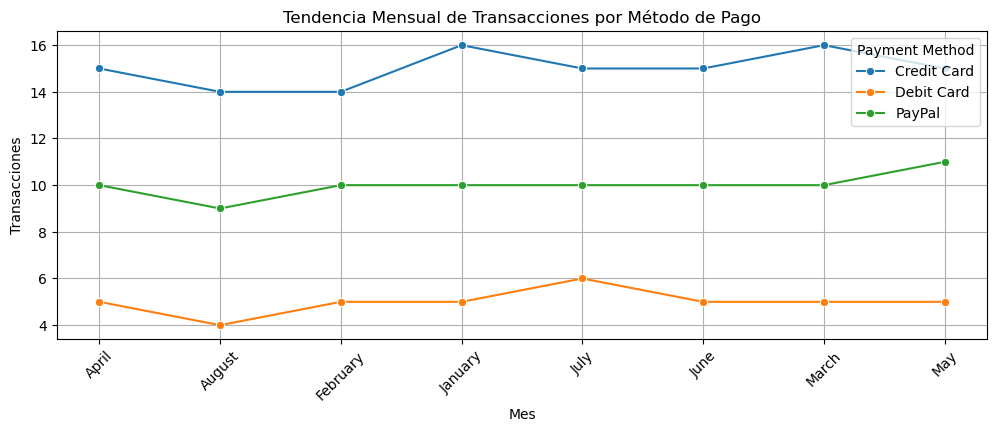

In [16]:
# Gráfico de la tendencia mensual de Transacciones por Método de Pago
plt.figure(figsize=(12, 4))
sns.lineplot(data=transactions_method_by_month, x='Month', y='Transactions', hue = 'Payment Method', marker='o')
plt.title('Tendencia Mensual de Transacciones por Método de Pago')
plt.xlabel('Mes')
plt.ylabel('Transacciones')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

✅ **Respuesta:**

## **Impacto en ingresos y unidades vendidas**

### **4.** ¿Cómo se distribuyen los ingresos por método de pago?

In [17]:
# Agrupamos y sumamos los ingresos totales por método de pago
payment_sales = data.groupby('Payment Method')['Total Revenue'].sum().sort_values(ascending=False).reset_index()

# Calcular porcentaje
payment_sales['Percentage'] = (payment_sales['Total Revenue'] / payment_sales['Total Revenue'].sum() * 100).round(2)
payment_sales

,Payment Method,Total Revenue,Percentage
0,Credit Card,51170.86,63.51
1,PayPal,21268.06,26.40
2,Debit Card,8128.93,10.09


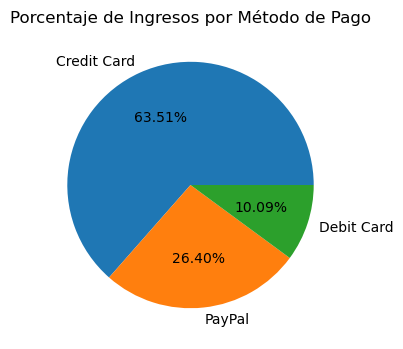

In [18]:
# Graficamos
plt.figure(figsize=(4, 4))
plt.pie(payment_sales['Percentage'], labels = payment_sales['Payment Method'],autopct='%1.2f%%')
plt.title('Porcentaje de Ingresos por Método de Pago')
plt.show()

✅ **Respuesta:**

- La **tarjeta de crédito** aporta la mayor parte de los ingresos, con un **63.51%** del total.

- **PayPal** representa el **26.40%** de los ingresos.

- La **tarjeta de débito** contribuye con un **10.09%**.

### **5.** ¿Cual es el ticket promedio según el método de pago?

In [19]:
# Calculamos el promedio de ingresos por método de pago
ticket_medio = data.groupby('Payment Method')['Total Revenue'].mean().reset_index().sort_values(by='Total Revenue', ascending=False).round(2)
ticket_medio.columns = ['Payment Method','Ticket Medio']
ticket_medio

,Payment Method,Ticket Medio
0,Credit Card,426.42
2,PayPal,265.85
1,Debit Card,203.22


✅ **Respuesta:**

El ticket medio varía según el método de pago:

- **Tarjeta de crédito:** 426.42

- **PayPal:** 265.85

- **Tarjeta de débito:** 203.22

Esto indica que las transacciones con tarjeta de crédito suelen tener un valor promedio más alto.

### **6.** ¿Hay diferencias de ingresos entre métodos de pago según la región?

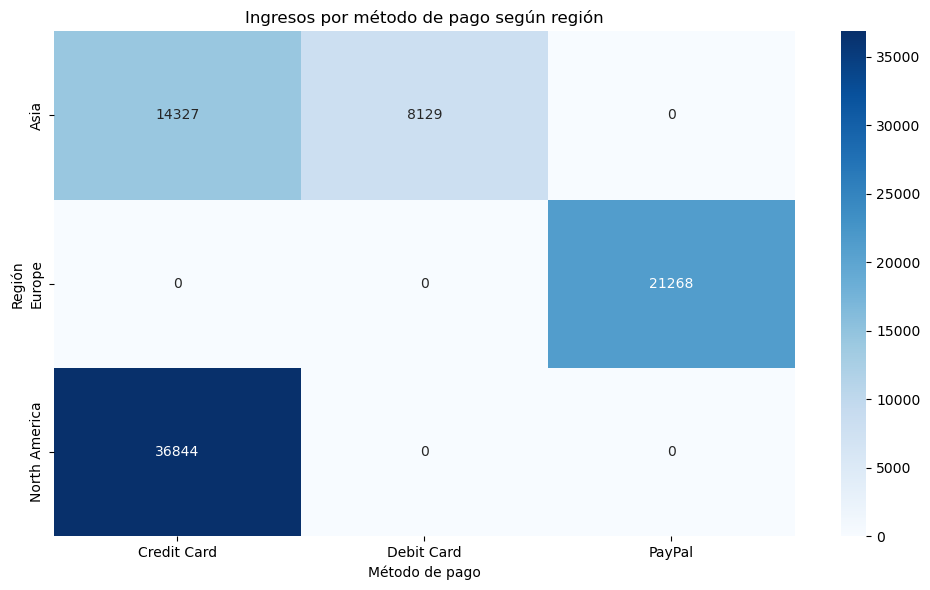

In [20]:
# Creamos una tabla resumen con los ingresos por región y método de pago
region_payment = data.pivot_table(index='Region', columns='Payment Method', values='Total Revenue', aggfunc='sum', fill_value=0)

# Heatmap de ingresos por método de pago y región
plt.figure(figsize=(10,6))
sns.heatmap(region_payment, annot=True, fmt=".0f", cmap="Blues")
plt.title('Ingresos por método de pago según región')
plt.xlabel('Método de pago')
plt.ylabel('Región')
plt.tight_layout()
plt.show()

✅ **Respuesta:**

- En **Norteamérica**, los ingresos provienen exclusivamente de la tarjeta de crédito como método de pago.

- En **Europa**,  los ingresos se generan únicamente mediante PayPal.

- En **Asia** la mayor parte de los ingresos corresponde a la tarjeta de crédito, seguida en menor medida por la tarjeta de débito, sin registros de uso de PayPal.

### **7.** ¿Existe alguna correlación entre método de pago y unidades vendidas?

In [21]:
# Agrupamos por método de pago y sumamos las unidades vendidas
payment_units_by_method = data.groupby('Payment Method')['Units Sold'].sum().sort_values(ascending=False).reset_index()
payment_units_by_method

,Payment Method,Units Sold
0,Credit Card,268
1,Debit Card,145
2,PayPal,105


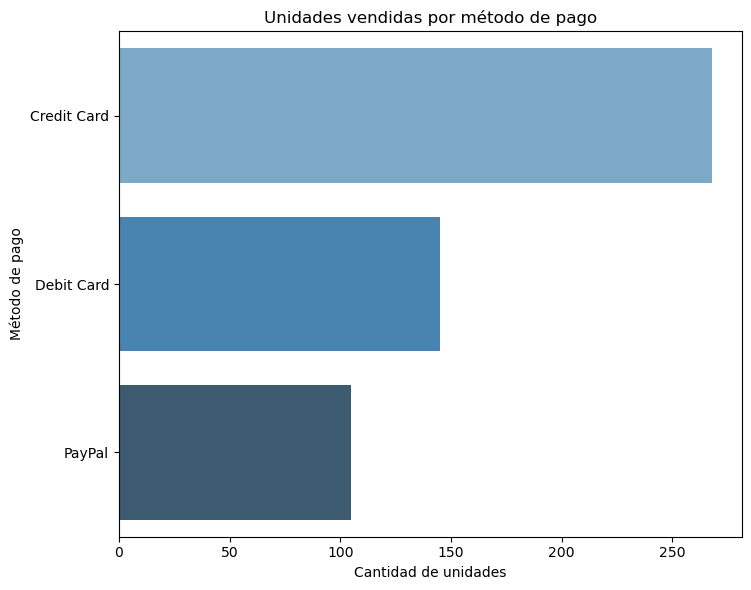

In [22]:
plt.figure(figsize=(14,6))

# Gráfico de las unidades vendidas por método de pago
plt.subplot(1, 2, 2)
sns.barplot(data=payment_units_by_method, x='Units Sold', y='Payment Method', hue = 'Payment Method', palette='Blues_d')
plt.title('Unidades vendidas por método de pago')
plt.xlabel('Cantidad de unidades')
plt.ylabel('Método de pago')

plt.tight_layout()
plt.show()

✅ **Respuesta:**

La tarjeta de crédito también es el método con más unidades vendidas.